We start by importing the libraries required

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd


We are going to find the solution y to the initial value problem
 $$y'= f(x,y(x))$$ with $$y(a)=y0$$ 

where:
<br>
• N= $ \frac{b-a}{h}$

<br>
In this problem, the inital value problem is given by
$$y'= -(y+1)(y+3)$$
$$y(0)=-2$$

For which the exact solution is 
$$y=-3+ \frac{2}{1+e^{-2x}}$$

in the interval [0,10]. Thus, we are going to implement the 2-step method given by
$$y_{n+1} = y_{n} +\frac{h}{2}[f(x_{n+1},y_{n+1}) + f(x_{n},y_{n})] $$

To find the approximated solutions.


<br>
<br>
So firstly, we need to define the time step (h), initial value ($y_{n0}$),and $y'=f$

In [2]:
#time step
h = 0.01 

#initial value
yn0=-2

#y'(x)
f = lambda x: -(x+1)*(x+3)



Next, we can calculate the discrete time step x,

$$x_{j}=a+jh$$

Since we know that the time step is h=0.01, we can compute N

In [3]:
#number of points
N=(10-0)/0.01
N

1000.0

Since N=1000 and there are N+1 points including the initial points, there are a total of 1001 discrete time points in the interval [0,10]

In [4]:
#discrete time points in a straight line for h = 0.01
X= np.linspace(0,10,1001)
X

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

Now, we will compute the approximated solutions using the 2-step method.
$$y_{n+1} = y_{n} +\frac{h}{2}[f(x_{n+1},y_{n+1}) + f(x_{n},y_{n})] $$
If we take n=0, then $$y_{1} = y_{0} +\frac{h}{2}[f(x_{1},y_{1}) + f(x_{0},y_{0})] $$

However, we know that $f(x_{1},y_{1})$ is still unknown. <br>
Thus, we need to solve for $y_{1}$ in order to use this equation.

<br>
we start with our equation
$$y_{n+1} = y_{n} +\frac{h}{2}[f(x_{n+1},y_{n+1}) + f(x_{n},y_{n})] $$

where 
$$y'=f(x_{n},y_{n})= -(y+1)(y+3)$$

<br>
Now to simplify this equation, let 
$$y_{n+1} = x$$
and $$y'(x)= -(x+1)(x+3)$$ 

Note that yn will be a constant because its value is known. The new variable gives us
<br>
$$x = y_{n} +\frac{h}{2}[y'(x) + y'(y_{n})]$$

Substitute $y'(x)= -(x+1)(x+3)$
$$x = y_{n} +\frac{h}{2} [-(x+1)(x+3) -(y_{n}+1)(y_{n}+3)] $$

Expand the brackets
$$x = y_{n} +\frac{h}{2} [-(x^{2} +4x+3) -(y_{n}^{2}+4y_{n}+3)] $$

Now move the RHS to the LHS
$$x - y_{n} +\frac{h}{2}x^{2} +\frac{h}{2}4x+3\frac{h}{2} +\frac{h}{2}y_{n}^{2}+\frac{h}{2}4y_{n}+3\frac{h}{2} =0$$

After simplifying, we obtain
$$\frac{h}{2}x^{2} +(1+2h)x+3h +(2h-1)y_{n}+\frac{h} {2}y_{n}^{2}=0 $$

To solve for x, we can use the solve function from the sympy library which will apply the following quadratic function to solve our function.

$$x = \frac{-b±\sqrt{b^{2}-4ac}} {2a} $$

where:
<br>
$a=\frac{h}{2}$
<br>
$b=(1+2h)$
<br>
$c=3h +(2h-1)y_{n}+\frac{h} {2}y_{n}^{2}$

we will only consider $x = \frac{-b+\sqrt{b^{2}-4ac}} {2a} $ since approximations are otherwise too far from the exact solution we will be computing below. (i.e. the first approximation for $x = \frac{-b-\sqrt{b^{2}-4ac}} {2a} $ is -202.009999500050 )

In [5]:
from sympy import symbols, solve
#we create an array consisting of our known value, which is our initial condition, -2
YN1=[-2] 
x = symbols('x')

#solve the equation of x=y_{n+1} using a for loop to apply sympy's solve
for i in range(1,1001):
    a= h/2
    b= 1+2*h
    c= (h/2)*YN1[i-1]**2 -(1- 2*h)*YN1[i-1] +3*h
    expr = (h/2) *x**2 + (1+ 2*h) *x +(h/2)*(YN1[i-1])**2 -(1- 2*h)*(YN1[i-1]) +3*h
    sol = solve(expr)[1]
    YN1.append(sol)

YN1

[-2,
 -1.99000049995001,
 -1.98000299930019,
 -1.97000949585208,
 -1.96002198421250,
 -1.95004245420314,
 -1.94007288927805,
 -1.93011526495200,
 -1.92017154724232,
 -1.91024369112658,
 -1.90033363901906,
 -1.89044331926807,
 -1.88057464467701,
 -1.87072951105105,
 -1.86090979577217,
 -1.85111735640455,
 -1.84135402933242,
 -1.83162162843252,
 -1.82192194378311,
 -1.81225674041125,
 -1.80262775708023,
 -1.79303670511874,
 -1.78348526729328,
 -1.77397509672517,
 -1.76450781585364,
 -1.75508501544591,
 -1.74570825365549,
 -1.73637905512966,
 -1.72709891016669,
 -1.71786927392383,
 -1.70869156567635,
 -1.69956716812822,
 -1.69049742677472,
 -1.68148364931714,
 -1.67252710512977,
 -1.66362902477901,
 -1.65479059959450,
 -1.64601298129221,
 -1.63729728164878,
 -1.62864457222695,
 -1.62005588415147,
 -1.61153220793467,
 -1.60307449335117,
 -1.59468364936079,
 -1.58636054407873,
 -1.57810600479217,
 -1.56992081802198,
 -1.56180572962877,
 -1.55376144496171,
 -1.54578862904923,
 -1.53788790683

After getting the approximate values, we now calculate the exact solution in the same interval [0,10].
$$y=-3+ \frac{2}{1+e^{-2x}}$$

Text(0.5, 1.0, 'Approximated Solution vs Exact Solution')

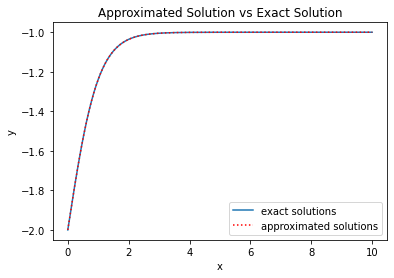

In [6]:
#calculate exact sol
y= lambda x: -3 + 2/(1+ np.exp(-2*x))
Y= [y(d) for d in X] #recall X is our discrete time points in the interval [0,10] with time step h=0.01

#plot the exact values and the approximated values in one graph
plt.plot(X,Y, label='exact solutions') #exact sol
plt.plot(X,YN1,color='r', linestyle=':',label='approximated solutions') #approximated solution
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Approximated Solution vs Exact Solution')

From the graph, we can see how close the approximations are to the exact solutions. To further see how accurate the approximations are, we are going to compute the absolute error.

<center>error= $|y_{exact}-y_{approximate}|$

In [7]:
#abs error
er= np.abs(np.array(Y)-np.array(YN1))

Now, to create a table, the panda library will be used to generate a table consisting of all the points, including the approximation values, the exact values and the absolute value error that we have calculated.

In [8]:
pd.set_option('display.max_rows', None)
data = {'x': X,
        'Numerical Approximations': YN1,
        'Exact Solution': Y,
        'Absolute Value Error in [0,10]': er}
df = pd.DataFrame(data)
df

,x,Numerical Approximations,Exact Solution,"Absolute Value Error in [0,10]"
0,0.00,-2,-2.000000,0
1,0.01,-1.99000049995001,-1.990000,1.66630005793422e-7
2,0.02,-1.98000299930019,-1.980003,3.33060125923268e-7
3,0.03,-1.97000949585208,-1.970009,4.99090895278442e-7
4,0.04,-1.96002198421250,-1.960021,6.64523665205863e-7
5,0.05,-1.95004245420314,-1.950042,8.29161020288183e-7
6,0.06,-1.94007288927805,-1.940072,9.92807190902667e-7
7,0.07,-1.93011526495200,-1.930114,1.15526843269542e-6
8,0.08,-1.92017154724232,-1.920170,1.31635344979841e-6
9,0.09,-1.91024369112658,-1.910242,1.47587374321745e-6
